In [222]:
import pandas as pd
from tensorflow.keras import Sequential, layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [223]:
df = pd.read_csv('AQI and Lat Long of Countries.csv')
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [224]:
import numpy as np

In [225]:
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

## **MELAKUKAN TRAIN TEST SPLIT DATA**

In [226]:
X = df[['AQI Value', 'Ozone AQI Value']]
y = df['PM2.5 AQI Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MELAKUKAN ***STANDARISASI*** DAN ***LABEL ENCODING***

In [227]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [228]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

## MELAKUKAN ***SEQUNTIAL MODEL*** DAN ***MODEL COMPILE***

In [229]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.add(Dropout(0.63))

# MODEL COMPILE
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## **MENGGUNAKAN CALLBACK**

In [230]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)
callback_list = [early_stopping, model_checkpoint]

## **MELATIH MODEL DENGAN CALLBACK**

In [231]:
history = model.fit(X_train, y_train, epochs=20, batch_size=20, validation_data=(X_test, y_test), callbacks=callback_list , verbose=1)

Epoch 1/20
668/668 [==============================] - 2s 2ms/step - loss: 8.6696 - accuracy: 0.4152 - val_loss: -4.7422 - val_accuracy: 0.4756
Epoch 2/20
668/668 [==============================] - 1s 2ms/step - loss: 8.3682 - accuracy: 0.4477 - val_loss: -7.1661 - val_accuracy: 0.4477
Epoch 3/20
668/668 [==============================] - 1s 2ms/step - loss: 8.3025 - accuracy: 0.4459 - val_loss: -3.3673 - val_accuracy: 0.4783
Epoch 4/20
668/668 [==============================] - 1s 2ms/step - loss: 8.4248 - accuracy: 0.4581 - val_loss: -6.8687 - val_accuracy: 0.4765
Epoch 5/20
668/668 [==============================] - 1s 2ms/step - loss: 8.5116 - accuracy: 0.4248 - val_loss: -7.5540 - val_accuracy: 0.4531
Epoch 6/20
668/668 [==============================] - 1s 2ms/step - loss: 8.4084 - accuracy: 0.4557 - val_loss: -7.5828 - val_accuracy: 0.4756
Epoch 7/20
668/668 [==============================] - 1s 2ms/step - loss: 8.1506 - accuracy: 0.4591 - val_loss: -8.5944 - val_accuracy: 0.4459

## **EVALUASI MODEL DENGAN R2 SCORE**

In [232]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

105/105 [==============================] - 0s 1ms/step
R2 Score: -8.553533203330142


## **ACCURACY**

In [233]:
y_pred = np.where(y_pred > 0.5, 1, 0).reshape(-1)

In [234]:
accuracy_score(y_test, y_pred)

0.4752920035938904

# ****GRAFIK****

### **ACCURACY MODEL**

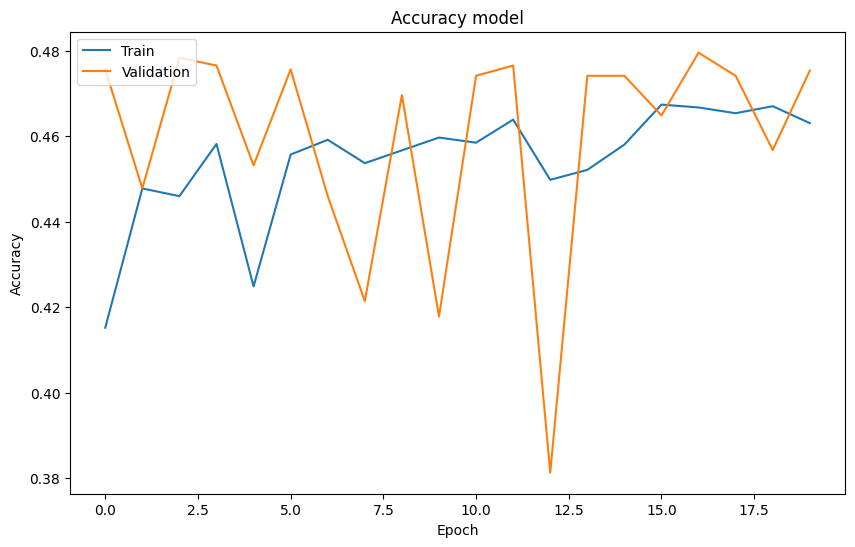

In [236]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label='Train Accuracy')
plt.plot(history.history["val_accuracy"], label='Validation Accuracy') 
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### **LOSS MODEL**

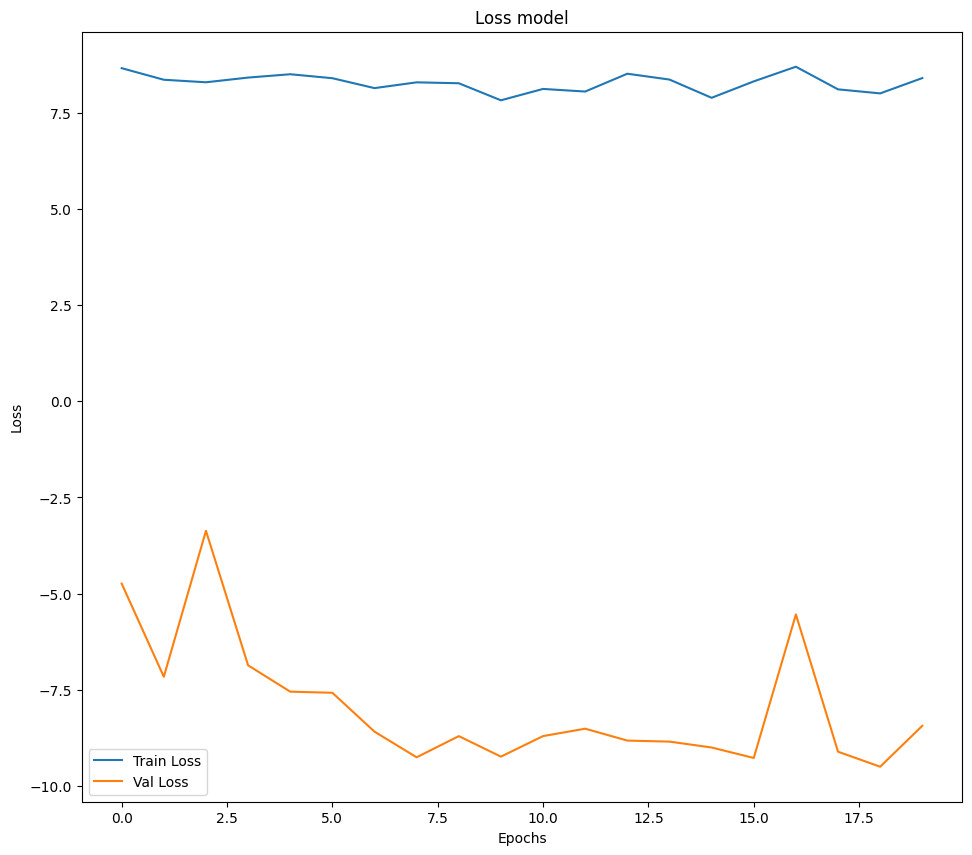

In [238]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()